# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2023**

---

Grupo 9
*   *Bosch, Candelaria*
*   *Juarez, Manuel*
*   *Mecchia, Martín*
*   *Montironi, Sebastian*




----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
seaborn.set_context('talk')

In [ ]:
#leemos el csv generado en el entregable 1
from google.colab import files
uploaded = files.upload()

Saving merged_melb_airbnb_df.csv to merged_melb_airbnb_df.csv


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas.
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [ ]:
df = pandas.read_csv('merged_melb_airbnb_df.csv')
df[:3]

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,zipcode,airbnb_price_mean
0,Abbotsford,2,h,1480000.0,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,4019.0,3067.0,130.624031
1,Abbotsford,2,h,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,4019.0,3067.0,130.624031
2,Abbotsford,3,h,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,4019.0,3067.0,130.624031


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12553 entries, 0 to 12552
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Suburb             12553 non-null  object 
 1   Rooms              12553 non-null  int64  
 2   Type               12553 non-null  object 
 3   Price              12553 non-null  float64
 4   Distance           12553 non-null  float64
 5   Postcode           12553 non-null  float64
 6   Bathroom           12553 non-null  float64
 7   Car                12496 non-null  float64
 8   Landsize           12553 non-null  float64
 9   BuildingArea       6534 non-null   float64
 10  YearBuilt          7554 non-null   float64
 11  CouncilArea        11382 non-null  object 
 12  Lattitude          12553 non-null  float64
 13  Longtitude         12553 non-null  float64
 14  Propertycount      12553 non-null  float64
 15  zipcode            12546 non-null  float64
 16  airbnb_price_mean  125

In [ ]:
categorical_cols = ['Type', 'Suburb', 'CouncilArea']
numerical_cols = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'zipcode', 'airbnb_price_mean']

In [ ]:
df[categorical_cols].nunique()

Type             3
Suburb         248
CouncilArea     27
dtype: int64

In [ ]:
# Check for nulls
df[categorical_cols].isna().sum()

Type              0
Suburb            0
CouncilArea    1171
dtype: int64

In [ ]:
# Calcular la moda de la columna
moda = df['CouncilArea'].mode()[0]
# Imputar los valores NaN por la moda
df['CouncilArea'] = df['CouncilArea'].fillna(moda)

In [ ]:
# Check for nulls
df[categorical_cols].isna().sum()

Type           0
Suburb         0
CouncilArea    0
dtype: int64

---

*Reemplazamos los valores faltantes de la variable CouncilArea por la moda ya que es variable categorica. Otro metodo hubiera sido chequear las coordenadas o zipcode y en base a eso buscar un imputacion mas adecuada, pero requeria un gasto computacional muy grande, ademas de agregar mucha complejidad al entregable. A fines practicos, requeria mas de lo que terminaba aportando.*

---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Definimos las columnas categóricas y numéricas:
categorical_cols = ['Type', 'Suburb', 'CouncilArea']
numerical_cols = ['Rooms', 'Price', 'Distance', 'Postcode', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'zipcode', 'airbnb_price_mean']

# Creamos el encoder y codificamos las variables categóricas:
encoder = OneHotEncoder(categories='auto')
categorias_encoded = encoder.fit_transform(df[categorical_cols]).toarray()

# Obtenemos las categorías únicas y sus nombres:
column_names_encoded = encoder.get_feature_names_out(categorical_cols)

# Creamos un DataFrame para las variables categóricas codificadas:
df_categorias = pd.DataFrame(categorias_encoded, columns=column_names_encoded)

# Obtenemos el DataFrame solo con las columnas numéricas:
df_numericas = df[numerical_cols]

# Concatenamos los DataFrames:
df_concatenado = pd.concat([df_categorias, df_numericas], axis=1)
df_concatenado[:3]

,Type_h,Type_t,Type_u,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,...,Price,Distance,Postcode,Car,Landsize,Lattitude,Longtitude,Propertycount,zipcode,airbnb_price_mean
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1480000.0,2.5,3067.0,1.0,202.0,-37.7996,144.9984,4019.0,3067.0,130.624031
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1035000.0,2.5,3067.0,0.0,156.0,-37.8079,144.9934,4019.0,3067.0,130.624031
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1465000.0,2.5,3067.0,0.0,134.0,-37.8093,144.9944,4019.0,3067.0,130.624031


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
df_concatenado_copy = df_concatenado.copy()
df_extra = df[['YearBuilt', 'BuildingArea']]
df_concatenado_copy = pd.concat([df_concatenado_copy, df_extra], axis=1)
df_concatenado_copy[:3]

,Type_h,Type_t,Type_u,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,...,Postcode,Car,Landsize,Lattitude,Longtitude,Propertycount,zipcode,airbnb_price_mean,YearBuilt,BuildingArea
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,202.0,-37.7996,144.9984,4019.0,3067.0,130.624031,NaN,NaN
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,0.0,156.0,-37.8079,144.9934,4019.0,3067.0,130.624031,1900.0,79.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,0.0,134.0,-37.8093,144.9944,4019.0,3067.0,130.624031,1900.0,150.0


In [ ]:
missing_values_count = df_concatenado_copy.isna().sum()
missing_values_gt_zero = missing_values_count[missing_values_count > 0]
print(missing_values_gt_zero)

Car                    57
zipcode                 7
airbnb_price_mean       7
YearBuilt            4999
BuildingArea         6019
dtype: int64


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

df_mice = df_concatenado_copy.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    df_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
missing_values_count = df_mice.isna().sum()
missing_values_gt_zero = missing_values_count[missing_values_count > 0]
print(missing_values_gt_zero)

Car                  57
zipcode               7
airbnb_price_mean     7
dtype: int64


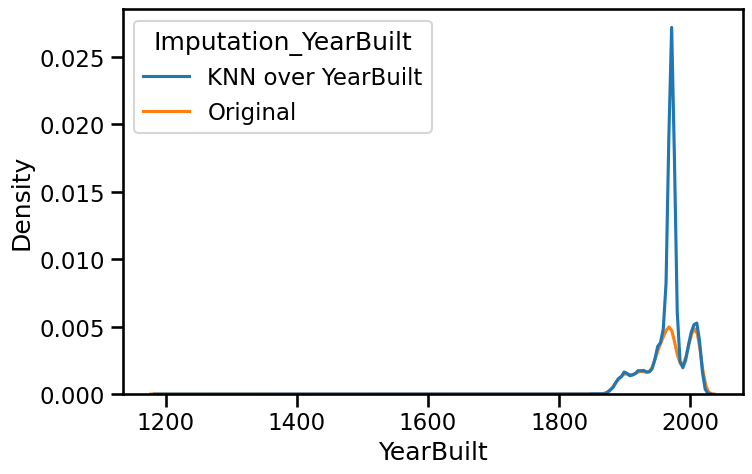

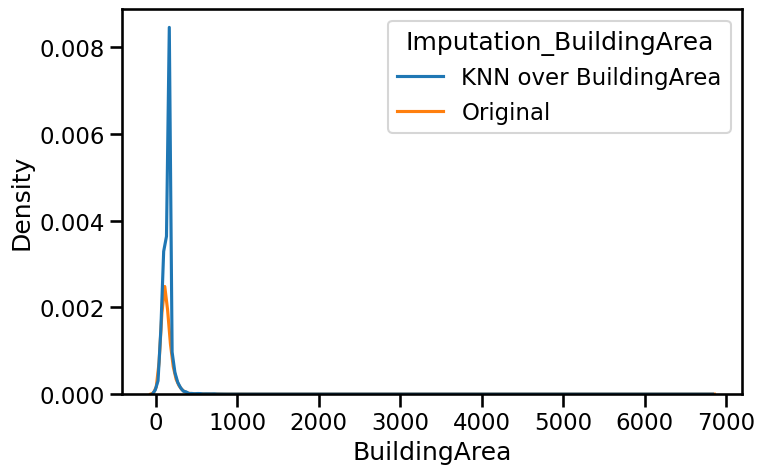

In [ ]:
mice_year_built_1 = df_mice.YearBuilt.to_frame()
mice_year_built_1['Imputation_YearBuilt'] = 'KNN over YearBuilt'

mice_year_built_2 = df_mice.BuildingArea.to_frame()
mice_year_built_2['Imputation_BuildingArea'] = 'KNN over BuildingArea'

melb_year_build_1 = df_concatenado_copy.YearBuilt.dropna().to_frame()
melb_year_build_1['Imputation_YearBuilt'] = 'Original'

melb_year_build_2 = df_concatenado_copy.BuildingArea.dropna().to_frame()
melb_year_build_2['Imputation_BuildingArea'] = 'Original'

data = pandas.concat([mice_year_built_1, melb_year_build_1])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation_YearBuilt')

data_2 = pandas.concat([mice_year_built_2, melb_year_build_2])
fig = plt.figure(figsize=(8, 5))
g_2 = seaborn.kdeplot(data=data_2, x='BuildingArea', hue='Imputation_BuildingArea')
# Hay un pico en 1980-1990

---

*Debido a las imputacion por KNN los valores faltantes tomaron años cercanos a 1980-1990, por lo que se modificó la distribución de la variable YearBuilt teniendo un pico en esa posición.*

---

In [ ]:
# Qué pasa si ahora escalamos las variables YearBuilt y BuildingArea?

from sklearn.preprocessing import StandardScaler

df_concatenado_copy_scaled = df_concatenado_copy.copy()
scaler = StandardScaler()
df_concatenado_copy_scaled[['YearBuilt', 'BuildingArea']] = scaler.fit_transform(df_concatenado_copy[['YearBuilt', 'BuildingArea']])

df_mice_new = df_concatenado_copy_scaled.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_mice_new[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    df_mice_new[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


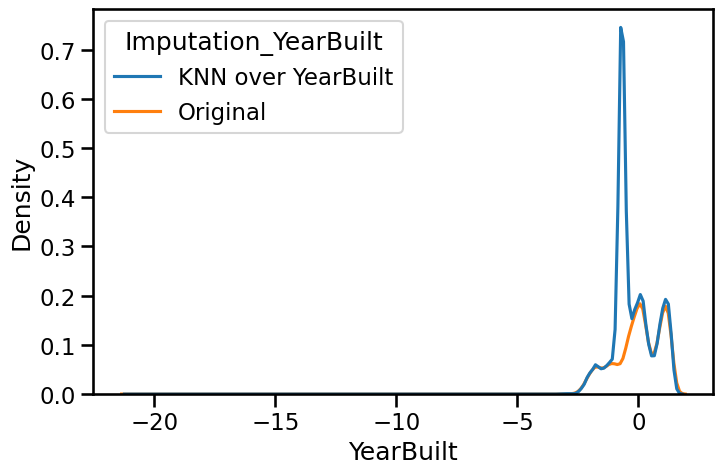

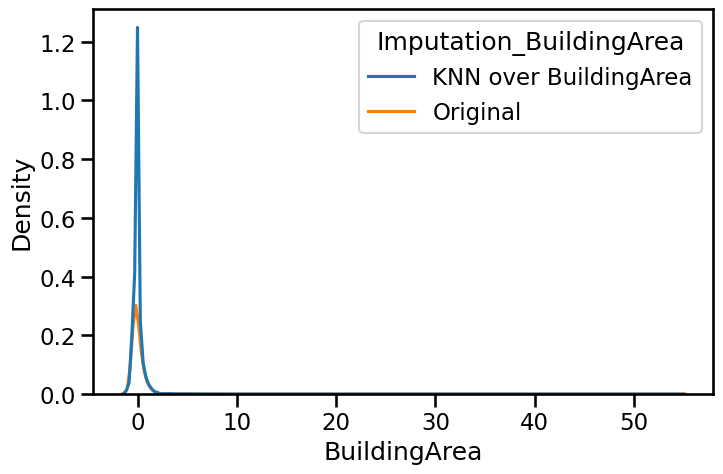

In [ ]:
mice_year_built_1 = df_mice_new.YearBuilt.to_frame()
mice_year_built_1['Imputation_YearBuilt'] = 'KNN over YearBuilt'
melb_year_build_1 = df_concatenado_copy_scaled.YearBuilt.dropna().to_frame()
melb_year_build_1['Imputation_YearBuilt'] = 'Original'

mice_year_built_2 = df_mice_new.BuildingArea.to_frame()
mice_year_built_2['Imputation_BuildingArea'] = 'KNN over BuildingArea'
melb_year_build_2 = df_concatenado_copy_scaled.BuildingArea.dropna().to_frame()
melb_year_build_2['Imputation_BuildingArea'] = 'Original'

data = pandas.concat([mice_year_built_1, melb_year_build_1])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation_YearBuilt')

data_2 = pandas.concat([mice_year_built_2, melb_year_build_2])
fig = plt.figure(figsize=(8, 5))
g_2 = seaborn.kdeplot(data=data_2, x='BuildingArea', hue='Imputation_BuildingArea')


---

* *Variable YearBuilt: Ahora encontramos un pico en los valores escalados cercanos a -1 aproximadamente. Cambia la distribucion adaptandose mejor a la forma original e imputando datos en otra posicion de los datos escalados.*
+ *Variable Building Area:*

*Conclusión: El escalado o estandarización de las variables numéricas depende del contexto y de  cómo el algoritmo de regresión KNeighborsRegressor se vea afectado por la escala de las variables. En el caso de KNeighborsRegressor, las distancias entre los puntos de datos pueden influir en el resultado del algoritmo.*

*Si las variables "YearBuilt" y "BuildingArea" tienen escalas significativamente diferentes o varían en magnitud, es posible que sea beneficioso estandarizar o escalar estas variables antes de aplicar KNeighborsRegressor*.

*La estandarización o escalado garantiza que todas las variables tengan una escala similar, lo que puede ayudar a que el algoritmo de vecinos más cercanos funcione de manera más efectiva. Experimentamos con y sin escalado
para determinar la mejor opción.*

---

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:
# Para aplicar PCA debemos asegurarnos de que no haya NaN en los datos:

missing_values_count = df_mice.isna().sum()
missing_values_gt_zero = missing_values_count[missing_values_count > 0]
print(missing_values_gt_zero)

Car                  57
zipcode               7
airbnb_price_mean     7
dtype: int64


In [ ]:
# Imputamos los valores faltantes de estas cuatro variables por la media (buscamos algún método sencillo):

from sklearn.impute import SimpleImputer
df_mice_median = df_mice.copy()

#setting strategy to 'median'
median_imputer = SimpleImputer(strategy='median') # strategy can also be median or most_frequent
df_mice_median.iloc[:,:] = median_imputer.fit_transform(df_mice_median)

<ipython-input-23-5ba9677c968d>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_mice_median.iloc[:,:] = median_imputer.fit_transform(df_mice_median)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Obtenemos el número de componentes principales
n = min(20, df_mice.shape[0])

# Estandarizamos los datos
scaler = MinMaxScaler(feature_range=(-1, 1))
df_mice_median_scaled = scaler.fit_transform(df_mice_median)

# Aplicamos PCA
pca = PCA(n_components=n)
principal_components = pca.fit_transform(df_mice_median_scaled)

# Creamos un nuevo DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=[f"PC{i}" for i in range(1, n+1)])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.703288,-0.556469,-0.159035,-0.246175,0.066795,0.510015,-0.951668,1.205781,-0.273752,1.036337,-0.173761,-0.133069,-0.195587,-0.096629,0.087197,-0.037875,-0.413209,0.071349,0.002687,0.154621
1,-0.633307,-0.517295,-0.195678,-0.234407,0.147218,0.435690,-0.986740,1.132011,-0.296357,1.083604,-0.179784,-0.161265,-0.153050,-0.182932,0.076846,-0.037227,-0.358654,0.014082,0.010792,0.294749
2,-0.714298,-0.563360,-0.153283,-0.254263,0.060090,0.509315,-0.955548,1.217401,-0.274667,1.028065,-0.168986,-0.135938,-0.196826,-0.088772,0.086581,-0.039298,-0.418671,0.068528,0.001004,0.142062
3,-0.636956,-0.495081,-0.194161,-0.216350,0.182724,0.400614,-0.970012,1.066405,-0.289800,1.112639,-0.188699,-0.184781,-0.153663,-0.220344,0.070845,-0.056279,-0.323951,0.014314,0.017825,0.325286
4,-0.768020,-0.574766,-0.118181,-0.253025,0.026252,0.521379,-0.915765,1.210770,-0.254960,1.009102,-0.170111,-0.153319,-0.228194,-0.057122,0.095004,-0.052134,-0.425393,0.100531,-0.003390,0.064046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12548,-1.108703,1.581315,-0.135572,-0.246939,0.170591,-0.191879,0.086701,-0.368692,0.025078,0.155201,-0.021302,-0.104864,0.035249,-0.144803,0.013513,-0.041740,-0.108637,0.018690,0.065083,0.394715
12549,-1.148252,1.380431,-0.025508,-0.203740,-0.604392,-0.168884,0.245012,0.019485,0.185780,-0.078387,0.021670,-0.118107,-0.354810,0.069850,0.005092,-0.192956,-0.064970,-0.159034,-0.019843,-0.029542
12550,-1.046759,1.426395,-0.204626,-0.212348,-0.043038,0.106877,-0.132314,0.179961,-0.140967,-0.165645,0.034425,-0.103274,0.266424,0.264336,0.381440,0.088713,-0.018595,-0.000882,-0.067531,-0.151139
12551,-1.084617,1.415867,-0.186506,-0.211061,-0.076560,0.125322,-0.102225,0.183091,-0.125761,-0.180340,0.031623,-0.103887,0.239730,0.291396,0.389506,0.080919,-0.031177,0.025211,-0.070977,-0.212512


In [ ]:
loadings = pca.components_
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with loadings
loadings_df = pd.DataFrame(data=loadings.T, columns=[f"PC{i}" for i in range(1, n+1)], index=df_mice_median.columns)

# Plot the heatmap
plt.figure(figsize=(25, 96))
sns.heatmap(loadings_df, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Loadings of Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Features")
plt.xticks(rotation=45)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

---
* PC1: Type_h
* PC2: CouncilArea_Moreland
* PC3: Type_t
* PC4: CouncilArea_Darebin
* PC5: CouncilArea_Moone_Valley
* PC6: CouncilArea_Boroondara
* PC7: CouncilArea_Maribyrnong
* PC8: CouncilArea_Yarra
* PC9: CouncilArea_Stonnington
* PC10: CouncilArea_Yarra?

---

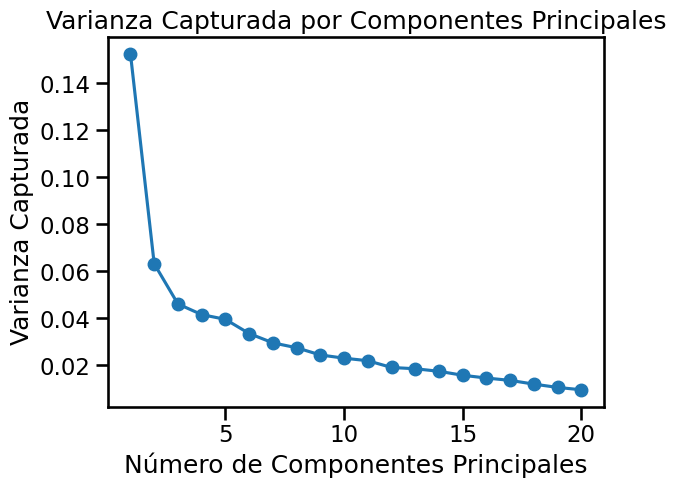

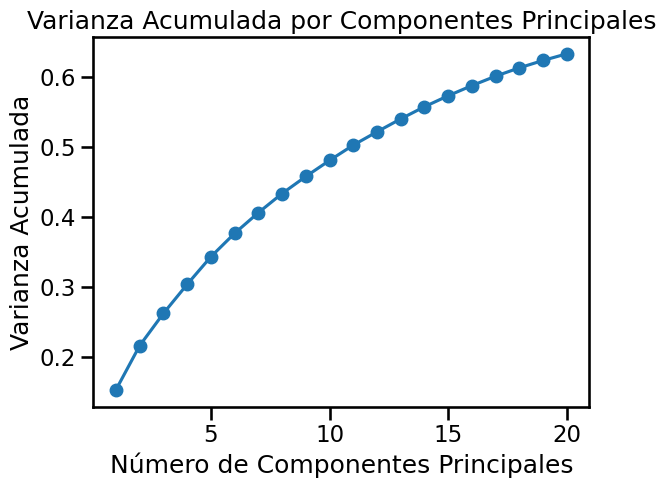

In [ ]:
import matplotlib.pyplot as plt
import numpy as mp

# Calculamos la varianza capturada por cada componente principal
variance_ratio = pca.explained_variance_ratio_

# Calculamos la varianza acumulada
cumulative_variance = np.cumsum(variance_ratio)

# Graficamos la varianza capturada por los primeros n componentes principales
plt.plot(range(1, n+1), variance_ratio, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Capturada')
plt.title('Varianza Capturada por Componentes Principales')
plt.show()

# Graficamos la varianza acumulada por los primeros n componentes principales
plt.plot(range(1, n+1), cumulative_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada por Componentes Principales')
plt.show()

In [ ]:
# Definimos el número de componentes principales a seleccionar
m = 5

# Seleccionamos las primeras m columnas de la matriz transformada
selected_components = principal_components[:, :m]

# Creamos un nuevo DataFrame con las nuevas características
df_new_features = pd.DataFrame(selected_components, columns=[f"PC{i}" for i in range(1, m+1)])
df_new_features

,PC1,PC2,PC3,PC4,PC5
0,-0.703288,-0.556469,-0.159035,-0.246175,0.066795
1,-0.633307,-0.517295,-0.195678,-0.234407,0.147218
2,-0.714298,-0.563360,-0.153283,-0.254263,0.060090
3,-0.636956,-0.495081,-0.194161,-0.216350,0.182724
4,-0.768020,-0.574766,-0.118181,-0.253025,0.026252
...,...,...,...,...,...
12548,-1.108703,1.581315,-0.135572,-0.246939,0.170591
12549,-1.148252,1.380431,-0.025508,-0.203740,-0.604392
12550,-1.046759,1.426395,-0.204626,-0.212348,-0.043038
12551,-1.084617,1.415867,-0.186506,-0.211061,-0.076560


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
# Estrategia más fácil:

# Primero convertimos el df_mice_median_scaled (antes de aplicar PCA) en un DataFrame (actualmente es un array):
df_mice_median_scaled = pd.DataFrame(df_mice_median_scaled, columns=df_mice_median.columns)

# Ahora concatenamos df_mice_median_scaled y df_new_features (que contiene las nuevas características obtenidas a partir de PCA):
df_final = pd.concat([df_mice_median_scaled, df_new_features], axis=1)
df_final[:]

,Type_h,Type_t,Type_u,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,...,Propertycount,zipcode,airbnb_price_mean,YearBuilt,BuildingArea,PC1,PC2,PC3,PC4,PC5
0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.658530,-0.821809,-0.770100,0.886618,-0.952687,-0.703288,-0.556469,-0.159035,-0.246175,0.066795
1,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.658530,-0.821809,-0.770100,0.712895,-0.976734,-0.633307,-0.517295,-0.195678,-0.234407,0.147218
2,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.658530,-0.821809,-0.770100,0.712895,-0.955824,-0.714298,-0.563360,-0.153283,-0.254263,0.060090
3,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.658530,-0.821809,-0.770100,0.886618,-0.952687,-0.636956,-0.495081,-0.194161,-0.216350,0.182724
4,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.658530,-0.821809,-0.770100,0.990268,-0.958180,-0.768020,-0.574766,-0.118181,-0.253025,0.026252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12548,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.803866,-0.869681,-0.878083,0.886618,-0.952687,-1.108703,1.581315,-0.135572,-0.246939,0.170591
12549,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.341235,-0.601064,-0.788683,0.909976,-0.939685,-1.148252,1.380431,-0.025508,-0.203740,-0.604392
12550,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.436433,-0.957447,-0.599781,0.944039,-0.960831,-1.046759,1.426395,-0.204626,-0.212348,-0.043038
12551,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.436433,-0.957447,-0.599781,0.948905,-0.957709,-1.084617,1.415867,-0.186506,-0.211061,-0.076560


In [ ]:
# Finalmente guardamos el DataFrame final en un archivo CSV:

from google.colab import files

df_final.to_csv("df_final.csv", index=False)
files.download('df_final.csv') #Después de toda la curación el archivo tiene un tamaño de 21,5 MB.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de
     publicaciones de la plataforma AirBnB en el mismo código
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
